# This notebook is for the Fair-Shapely experiment

In [1]:
%reload_ext autoreload
%autoreload 2

In [3]:
!python --version

Python 3.9.23


In [5]:
%pip install scikit-learn


  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
    --------------------------------------- 0.3/11.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.2 MB 2.8 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/11.2 MB 1.6 MB/s eta 0:00:07
   --- ------------------------------------ 1.0/11.2 MB 1.4 MB/s eta 0:00:08
   --- ------------------------------------ 1.0/11.2 MB 1.4 MB/s eta 0:00:08
   ----- ---------------------------------- 1.6/11.2 MB 1.1 MB/s eta 0:00:09
   ------ --------------------------------- 1.8/11.2 MB 1.2 MB/s eta 0:00:08
   -------- ------------------------------- 2.4/11.2 MB 1.4 MB/s eta 0:00:07
   ----------- ---------------------------- 3.1/1

In [7]:
%pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 1.4 MB/s eta 0:01:30
   ---------------------------------------- 0.8/124.9 MB 1.5 MB/s eta 0:01:26
   ---------------------------------------- 1.0/124.9 MB 1.1 MB/s eta 0:01:49
   ---------------------------------------- 1.3/124.9 MB 1.2 MB/s eta 0:01:40
    --------------------------------------- 1.8/124.9 MB 1.4 MB/s eta 0:01:27
    --------------------------------------- 2.1/124.9 MB 1.4 MB/s eta 0:01:30
    --------------------------------------- 2.4/124.9 MB 1.4 MB/s eta 0:01:31
    --------------------------------------- 2.6/124.9 MB 1.3 MB/s eta 0:01:31
    --------------------------------------- 2.9/124.9 MB 1.3 MB/s eta 0:01:33
   - -------------------------------------- 3.4/124.9 MB 1.4 MB/s eta 0:01:26
   - --

### 1. Import libraries

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

### 2. Import dataset

In [9]:
from src.data.unified_dataloader import load_dataset

a, processed_census_income_kdd = load_dataset('census_income_kdd')

age                                           0
workclass                                     0
industry_code                                 0
occupation_code                               0
education                                     0
wage_per_hour                                 0
enrolled_in_edu_inst_last_wk                  0
marital_status                                0
major_industry_code                           0
major_occupation_code                         0
race                                          0
hispanic_origin                               0
sex                                           0
member_of_a_labour_union                      0
reason_for_unemployment                       0
employment_status                             0
capital_gains                                 0
capital_losses                                0
dividend_from_stocks                          0
tax_filler_status                             0
region_of_previous_residence            

In [10]:
processed_census_income_kdd.head(3)

,age,wage_per_hour,capital_gains,capital_losses,dividend_from_stocks,instance_weight,num_persons_worked_for_employer,weeks_worked_in_year,sex,workclass_ Federal government,...,own_business_or_self_employed_2,fill_inc_questionnaire_for_veteran's_admin_ No,fill_inc_questionnaire_for_veteran's_admin_ Not in universe,fill_inc_questionnaire_for_veteran's_admin_ Yes,veterans_benefits_0,veterans_benefits_1,veterans_benefits_2,year_94,year_95,class
0,1.706939,-0.203989,-0.093502,-0.138177,-0.10222,-0.043817,-0.843184,-0.970621,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1
1,1.030500,-0.203989,-0.093502,-0.138177,-0.10222,-0.691534,-0.421771,1.158280,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1
2,-0.773339,-0.203989,-0.093502,-0.138177,-0.10222,-0.753246,-0.843184,-0.970621,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1


### 3. Split label/unlabel data, split train/test data.

In [36]:
'''census income kdd dataset'''
sampled_data = processed_census_income_kdd.sample(n=2000, random_state=25) 
selected_columns = list(sampled_data.columns[:100]) 
if 'class' not in selected_columns:
    selected_columns.append('class')
df = sampled_data[selected_columns].copy()
X = df.drop('class', axis=1)
y = df['class']
X.shape

(2000, 100)

In [9]:
from xgboost import XGBClassifier
import numpy as np

# Dummy data
X = np.random.rand(100, 10)
y = np.random.randint(0, 2, 100)

model = XGBClassifier(tree_method="hist", device="cuda")
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [11]:
import xgboost
print(xgboost.get_config())

{'nthread': 0, 'use_rmm': False, 'verbosity': 1}


In [18]:
%pip install matplotlib
%pip install POT
%pip install shap
%pip install fairlearn



  Using cached shap-0.48.0-cp39-cp39-win_amd64.whl.metadata (25 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
Using cached shap-0.48.0-cp39-cp39-win_amd64.whl (544 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)

   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ------------------------------ --------- 3/4 [shap]
   ------------------------------ --------- 3/4 [shap]
   ------------------------------ --------- 3/4 [shap]
   ------------------------------ --------- 3/4 [shap]
   ------------------------------ --------- 3/4 [shap]
   ------------------------------ --------- 3/4 [shap]
   ------------------------------ --------- 3/4 [shap]
   ------------------------

In [10]:
!python --version

Python 3.13.1


In [8]:
%pip install ot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement ot (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for ot


In [13]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.8 MB 3.4 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/7.8 MB 3.2 MB/s eta 0:00:03
   ------------ --------------------------- 2.4/7.8 MB 3.6 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/7.8 MB 3.4 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/7.8 MB 3.4 MB/s eta 0:00:02
   --------------------- ------------------ 4.2/7.8 MB 3.5 MB/s eta 0:00:02
   -------------------------- ------------- 5.2/7.8 MB 3.5 MB/s eta 0:00:01
   -------------------------------- ------- 6.3/7.8 MB 3.7 MB/s eta 0:00:01
   ------------------------------------ --- 7.1/7.8 MB 3.8 MB/s eta 0:00:01
   ------------------------------------- -- 7.3/7.8 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 3.3 MB/s  0:00:02
Using cached cycler-0.12.1-py3-non

In [16]:
%pip install POT

In [37]:
from src.evaluation.five_fold_cross_validation import evaluate_model
model = XGBClassifier(tree_method="hist",device="cuda")
evaluate_model(model=model, X_train=X, y_train=y, num_folds=5, dataset_name='census_income_kdd',fairshap_base='DR')

-------------------------------------
-------------1th fold----------------
-------------------------------------
1. Split the census_income_kdd dataset into majority group and minority group according to the number of sensitive attribute, besides split by label 0 and label 1
X_train_majority_label0 shape: (18, 100)
X_train_majority_label1 shape: (831, 100)
X_train_minority_label0 shape: (75, 100)
X_train_minority_label1 shape: (676, 100)
2. Initialize FairnessExplainer
--------Next, we will modify the minority group--------
3(a). Match X_train_minority_label0 with X_train_majority_label0
3(b). Match X_train_minority_label1 with X_train_majority_label1
4(a). Use FairSHAP to find suitable values from X_train_majority_label0 to replace data in X_train_minority_label0
4(b). Use FairSHAP to find suitable values from X_train_majority_label1 to replace data in X_train_minority_label1
5. Calculate varphi and q
There are 259 SHAP values greater than 0.05 in X_train_minority
--------Next, we wi

0.9305

### 4. read saved_csv file and make plots

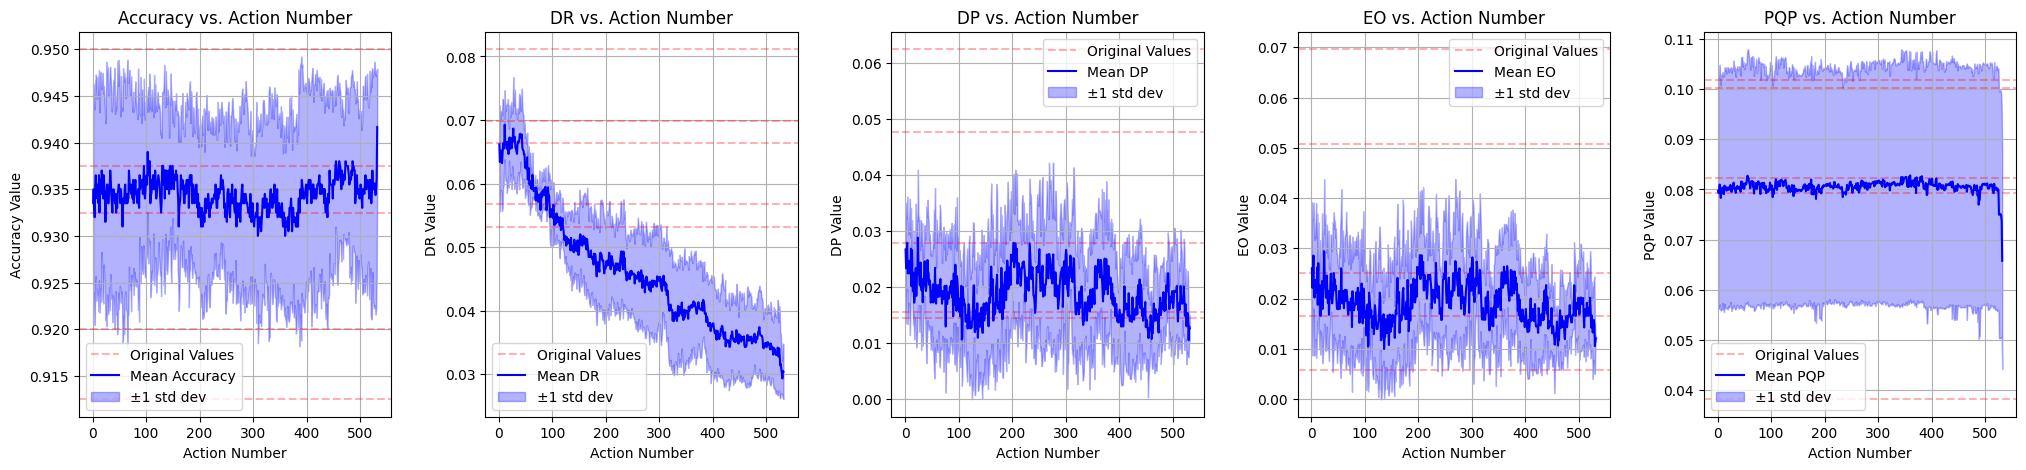

In [39]:
import pandas as pd
import numpy as np
from src.visualization.visualization2 import plot_results

def extract_original_values(fold):
    original_accuracy = fold.loc[0, 'new_accuracy']
    original_DR = fold.loc[0, 'new_DR']
    original_DP = fold.loc[0, 'new_DP']
    original_EO = fold.loc[0, 'new_EO']
    original_PQP = fold.loc[0, 'new_PQP']
    # original_recall = fold.loc[0, 'new_recall']
    # original_precision = fold.loc[0, 'new_precision']
    # original_sufficiency = fold.loc[0, 'new_sufficiency']
    return original_accuracy, original_DR, original_DP, original_EO, original_PQP

# fold1 = pd.read_csv('saved_results/census_income/fairSHAP-DR_1-fold_results.csv')
# fold2 = pd.read_csv('saved_results/census_income/fairSHAP-DR_2-fold_results.csv')
# fold3 = pd.read_csv('saved_results/census_income/fairSHAP-DR_3-fold_results.csv')
# fold4 = pd.read_csv('saved_results/census_income/fairSHAP-DR_4-fold_results.csv')
# fold5 = pd.read_csv('saved_results/census_income/fairSHAP-DR_5-fold_results.csv')
# fold1 = pd.read_csv('saved_results/census_income/fairSHAP-DR_0.05_NN_1-fold_results.csv')
# fold2 = pd.read_csv('saved_results/census_income/fairSHAP-DR_0.05_NN_2-fold_results.csv')
# fold3 = pd.read_csv('saved_results/census_income/fairSHAP-DR_0.05_NN_3-fold_results.csv')
# fold4 = pd.read_csv('saved_results/census_income/fairSHAP-DR_0.05_NN_4-fold_results.csv')
# fold5 = pd.read_csv('saved_results/census_income/fairSHAP-DR_0.05_NN_5-fold_results.csv')
fold1 = pd.read_csv('saved_results/census_income_kdd/fairSHAP-DR_0.05_OT_1-fold_results.csv')
fold2 = pd.read_csv('saved_results/census_income_kdd/fairSHAP-DR_0.05_OT_2-fold_results.csv')
fold3 = pd.read_csv('saved_results/census_income_kdd/fairSHAP-DR_0.05_OT_3-fold_results.csv')
fold4 = pd.read_csv('saved_results/census_income_kdd/fairSHAP-DR_0.05_OT_4-fold_results.csv')
fold5 = pd.read_csv('saved_results/census_income_kdd/fairSHAP-DR_0.05_OT_5-fold_results.csv')

fold1_original_values = extract_original_values(fold1)
fold2_original_values = extract_original_values(fold2)
fold3_original_values = extract_original_values(fold3)
fold4_original_values = extract_original_values(fold4)
fold5_original_values = extract_original_values(fold5)

fold1.drop(fold1.index[0], inplace=True)
fold2.drop(fold2.index[0], inplace=True)
fold3.drop(fold3.index[0], inplace=True)
fold4.drop(fold4.index[0], inplace=True)
fold5.drop(fold5.index[0], inplace=True)

folds = [fold1, fold2, fold3, fold4, fold5]
original_accuracy = [fold1_original_values[0], fold2_original_values[0], fold3_original_values[0], fold4_original_values[0], fold5_original_values[0]]
original_drs = [fold1_original_values[1], fold2_original_values[1], fold3_original_values[1], fold4_original_values[1], fold5_original_values[1]]
original_dps = [fold1_original_values[2], fold2_original_values[2], fold3_original_values[2], fold4_original_values[2], fold5_original_values[2]]
original_eos = [fold1_original_values[3], fold2_original_values[3], fold3_original_values[3], fold4_original_values[3], fold5_original_values[3]]
original_pqps = [fold1_original_values[4], fold2_original_values[4], fold3_original_values[4], fold4_original_values[4], fold5_original_values[4]]
# original_recalls = [fold1_original_values[4], fold2_original_values[4], fold3_original_values[4], fold4_original_values[4], fold5_original_values[4]]
# original_precisions = [fold1_original_values[5], fold2_original_values[5], fold3_original_values[5], fold4_original_values[5], fold5_original_values[5]]
# original_sufficiencies = [fold1_original_values[6], fold2_original_values[6], fold3_original_values[6], fold4_original_values[6], fold5_original_values[6]]

# 调用函数
plot_results(
    folds=folds,
    original_accuracy=original_accuracy,
    original_DR=original_drs, 
    original_DP=original_dps, 
    original_EO=original_eos, 
    original_PQP=original_pqps,
    stop_when_no_data=3,
    min_action=1,
    figsize=None,
    fill_alpha=0.3,
    fill_color='b',
    red_alpha=0.3
)

In [40]:
fold_last_rows = [
    fold1.iloc[-1], 
    fold2.iloc[-1], 
    fold3.iloc[-1], 
    fold4.iloc[-1], 
    fold5.iloc[-1]
]

# Convert to DataFrame for calculating mean and std
df_last_rows = pd.DataFrame(fold_last_rows)

# Calculate mean and std for each column
mean_values = df_last_rows.mean()
std_values = df_last_rows.std()

# Combine into a new DataFrame showing "mean ± std" format
result_df = pd.DataFrame({
    "Mean": mean_values,
    "Std": std_values,
    "Mean ± Std": mean_values.round(4).astype(str) + " ± " + std_values.round(4).astype(str)
})
result_df

,Mean,Std,Mean ± Std
action_number,547.800000,37.771683,547.8 ± 37.7717
new_accuracy,0.936500,0.010247,0.9365 ± 0.0102
new_DR,0.032448,0.007228,0.0324 ± 0.0072
new_DP,0.015898,0.004039,0.0159 ± 0.004
new_EO,0.014382,0.003333,0.0144 ± 0.0033
new_PQP,0.078928,0.025704,0.0789 ± 0.0257


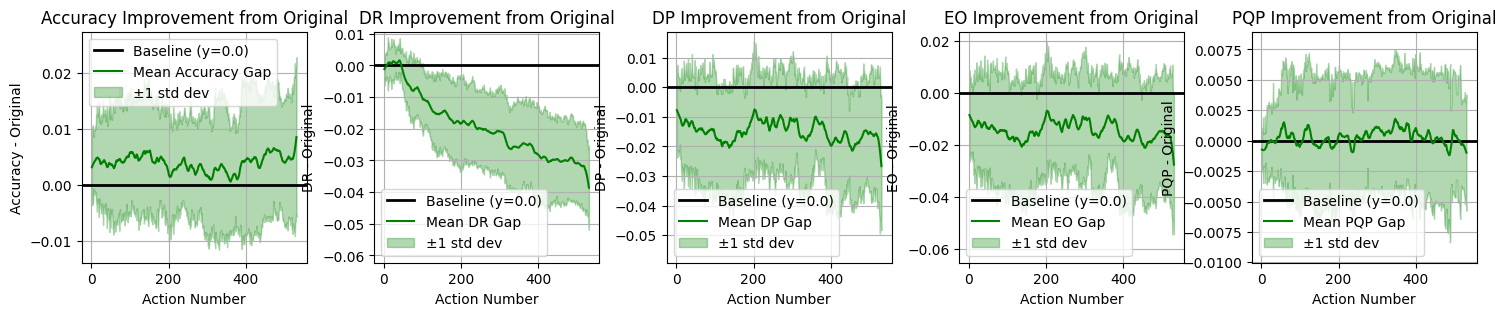

In [41]:
from src.visualization.visualization1 import plot_fairness_improvement

plot_fairness_improvement(
    folds=folds,
    original_accuracy=original_accuracy,
    original_DR=original_drs,
    original_DP=original_dps,
    original_EO=original_eos,
    original_PQP=original_pqps,
    stop_when_no_data=3,  
    min_action=1,
    baseline=0.0,
    figsize=(18,3),
    fill_alpha=0.3,
    fill_color='g',
    smooth_window=20,
    smooth_polyorder=2,
)